<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#download_data">Downloading Data</a></li>
        <li><a href="#polynomial_regression">Polynomial regression</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression.

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Lets plot Emission values with respect to Engine size:

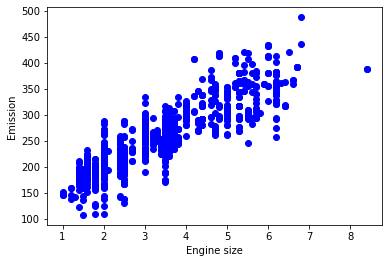

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

In [5]:
len(cdf)

1067

In [6]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [7]:
msk = np.random.rand(len(df)) < 0.8


In [8]:
~msk

array([False, False,  True, ..., False, False, False])

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [10]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
5,3.5,6,10.0,230
7,3.7,6,11.1,255
...,...,...,...,...
1061,3.2,6,11.2,258
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1065,3.2,6,11.3,260


In [11]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
4,3.5,6,10.6,244
6,3.5,6,10.1,232
9,2.4,4,9.2,212
12,5.9,12,15.6,359
...,...,...,...,...
1039,2.0,4,9.2,212
1043,1.8,4,8.6,198
1046,2.5,5,9.8,225
1056,2.5,5,9.7,223


<h2 id="polynomial_regression">Polynomial regression</h2>

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
#train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #independent
train_x = np.asanyarray(train[['ENGINESIZE']]) #independent
train_y = np.asanyarray(train[['CO2EMISSIONS']]) #dependent
#training -> train_x,train_y
#test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
#y_hat=prediction -> test_x
#evaluation -> test_y,y_hat



In [18]:
train_x[:5]

array([[2. ],
       [1.5],
       [3.5],
       [3.5],
       [3.7]])

In [23]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly[0:5]

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.7 , 13.69]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [24]:
clf = linear_model.LinearRegression() # am creating an object of linearRegression namely clf
clf.fit(train_x_poly, train_y) #3iv and 1dv 
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.04267156 -1.30306059]]
Intercept:  [109.48772589]


In [14]:
import numpy as np

In [34]:
range(0,10,1)

range(0, 10)

In [17]:
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
np.arange(0,11,.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])

In [35]:
import numpy as np
XX = np.arange(0.1,10,.1)#strating,ending,step
XX

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [20]:
z = range(1,10,1)

In [21]:
z

range(1, 10)

In [36]:
x = np.arange(0,101,10)

In [37]:
x

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

In [22]:
print(clf.intercept_,"----",clf.coef_)

[106.99915341] ---- [[ 0.         50.55613659 -1.49784652]]


In [39]:
clf.intercept_

array([109.48772589])

In [40]:
clf.intercept_[0]

109.48772588753374

In [41]:
clf.coef_

array([[ 0.        , 49.04267156, -1.30306059]])

In [42]:
#clf.coef_[rowindex][colindex]

In [44]:
clf.coef_[0][2]

-1.3030605944955063

In [23]:
clf.coef_[0][1] 


50.55613659495037

In [24]:
clf.coef_[0][2]

-1.497846518646659

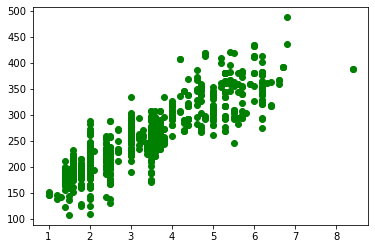

In [45]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')

In [26]:
XX = np.arange(0, 10, .1)


In [27]:
XX

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [46]:
# the degree i have used is 2 and the formulae for plotting when degree is 2 is  #y = b + m1xx + m2xx**2

In [ ]:
#y = b + m1xx + m2xx**2

In [47]:
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)


In [48]:
yy

array([114.37896244, 119.24413778, 124.0832519 , 128.89630482,
       133.68329652, 138.44422701, 143.17909629, 147.88790435,
       152.57065121, 157.22733685, 161.85796128, 166.4625245 ,
       171.04102651, 175.5934673 , 180.11984689, 184.62016526,
       189.09442242, 193.54261837, 197.9647531 , 202.36082663,
       206.73083894, 211.07479004, 215.39267993, 219.6845086 ,
       223.95027607, 228.18998232, 232.40362736, 236.59121119,
       240.75273381, 244.88819521, 248.99759541, 253.08093439,
       257.13821216, 261.16942872, 265.17458406, 269.15367819,
       273.10671112, 277.03368283, 280.93459332, 284.80944261,
       288.65823069, 292.48095755, 296.2776232 , 300.04822764,
       303.79277086, 307.51125288, 311.20367368, 314.87003327,
       318.51033165, 322.12456882, 325.71274478, 329.27485952,
       332.81091305, 336.32090537, 339.80483648, 343.26270637,
       346.69451506, 350.10026253, 353.47994879, 356.83357384,
       360.16113768, 363.4626403 , 366.73808171, 369.98

Text(0, 0.5, 'Emission')

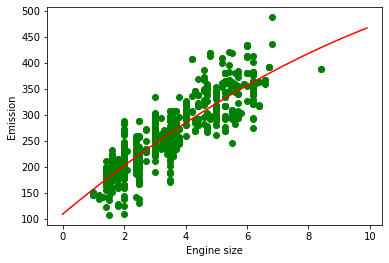

In [56]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
XX = np.arange(0, 10 , .1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>

In [25]:
test_x

array([[2.4],
       [3.5],
       [3.5],
       [2.4],
       [5.9],
       [2. ],
       [4. ],
       [3. ],
       [2. ],
       [3. ],
       [5.2],
       [4.2],
       [5.2],
       [3. ],
       [3. ],
       [2. ],
       [4. ],
       [6. ],
       [4. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4.4],
       [3. ],
       [4.4],
       [4.4],
       [4.4],
       [4.4],
       [2. ],
       [3. ],
       [3. ],
       [3.6],
       [2. ],
       [2. ],
       [2. ],
       [3.6],
       [3.6],
       [3. ],
       [6.2],
       [6.2],
       [3.6],
       [6.2],
       [1.4],
       [2. ],
       [1.4],
       [2.4],
       [3.6],
       [3.6],
       [5.3],
       [4.8],
       [2. ],
       [2.4],
       [5.3],
       [1.2],
       [1.2],
       [5.3],
       [5.3],
       [3.6],
       [1.4],
       [3.6],
       [3.6],
       [5.7],
       [3.6],
       [2.4],
       [6.4],
      

In [26]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x) 


In [29]:
test_x[:5]

array([[2.4],
       [3.5],
       [3.5],
       [2.4],
       [5.9]])

In [31]:
test_x_poly[:5]

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  5.9 , 34.81]])

In [32]:
pred = clf.predict(test_x_poly) #for the testing or evaluation we pass only IV AND DV will be generated by whome Ml

print(f"Mean absolute error: {np.mean(np.absolute(pred - test_y))}")
print(f"Residual sum of squares (MSE): {np.mean((pred - test_y) ** 2)}")
print(f"R2-score: {r2_score(pred , test_y)}")

Mean absolute error: 21.887804082276418
Residual sum of squares (MSE): 831.3868235264779
R2-score: 0.7015760388474287


# New predictions get value of Engine Size transform it and then predict

In [ ]:
#engine size is 3.25

In [38]:
transformed_data = poly.fit_transform([[3.25]])

In [39]:
transformed_data

array([[ 1.    ,  3.25  , 10.5625]])

In [40]:
clf.predict(transformed_data)
#clf.predict([[3.15]])

array([[255.48559349]])